In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 
%matplotlib inline

In [104]:
train = pd.read_csv('downloads/titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

In [105]:
# in titanic_train dataset i found many missing values
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [106]:
print(train.shape) # 891*12 = 10692
print(train.size)

(891, 12)
10692


MISSING DATA to find missing data we can use seaborn to create a simple heatmap to see where we are missing data

In [107]:
train.isnull().head()
# where there is a true there is missing values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


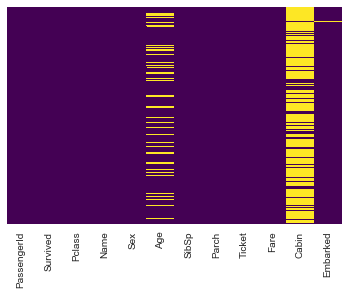

In [108]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Observation : 
cabin is not important feature since it has more missing values but without age feature machine learning model cant perform well on the dataset

roughly 20 percent of the age data is missing. the propprtion of age missing is likely small enough for reasonable replacement with some form of imputation. looking at the cabin column. it looks like we are just missing too much of that data to do something useful with at a basic level.
we will probably drop this later or change it to another feature like 'cabin known :1 or 0'



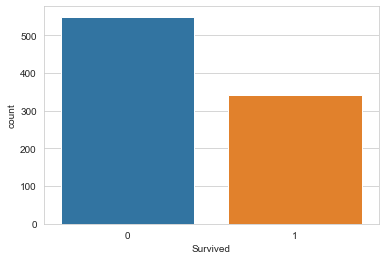

In [109]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)
#sns.countplot(x='Survived',data=train,palette='RdBu_r')

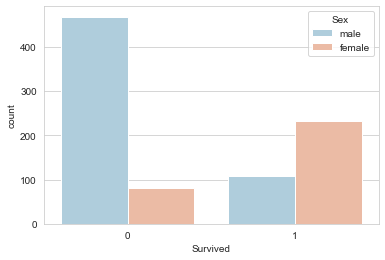

In [110]:
sns.set_style('whitegrid')
#sns.countplot(x='Survived',data=train)
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

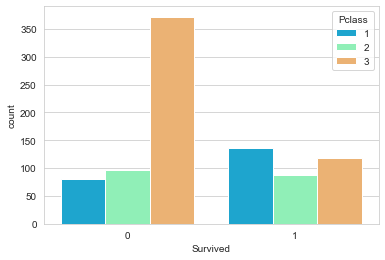

In [111]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,hue='Pclass',palette='rainbow')

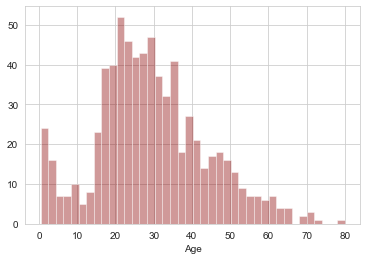

In [112]:
#sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)
sns.distplot(train['Age'].dropna(),bins=40,kde=False,color='darkred')

# here im dropping the missing values in age feature

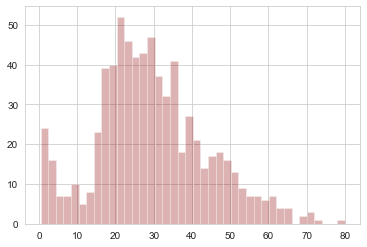

In [113]:
train['Age'].hist(bins=40,color='darkred',alpha=0.3)

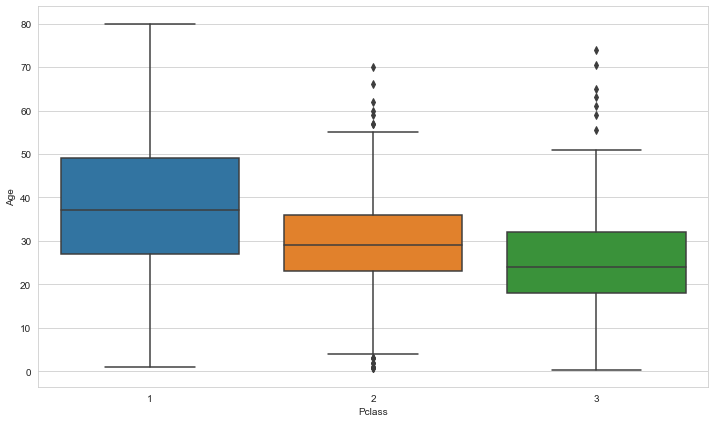

In [114]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train)


Observation : here we are trying to impute the missing values based on class label[Pclass]

here we are using classification Task where mean or median imputation based on class label

In [115]:
#We can see the wealthier passengers in the higher classes tend to be older,
# which makes sense. We'll use these average age values to impute based on Pclass for Age.


def impute_age(cols):
    Age = cols[0]    # x-axis
    Pclass = cols[1]  # y-axis
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38   # returning mean values 
        elif Pclass == 2:
            return 29
        elif Pclass == 3:
            return 24
        
    else:
        return Age

In [116]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)


# here we are imputing the values of mean values of Pclass based on age 

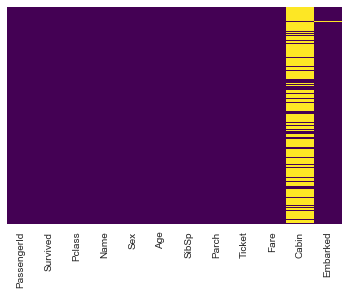

In [117]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [118]:
train = train[pd.notnull(train['Embarked'])]

# here we are simply ignoring the null values 

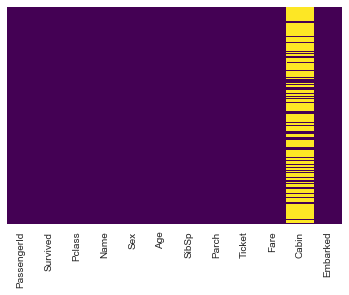

In [119]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

here we have to more than 80 percent of the missing values present in cabin .so simply ignore that feature since it is useless

In [120]:
train.drop('Cabin',axis=1,inplace=True)

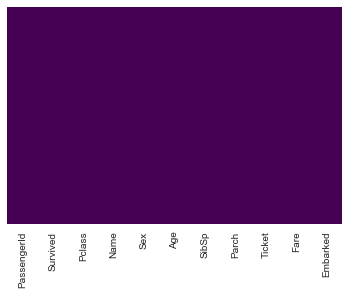

In [121]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [122]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [123]:
# now we have 5 categorical features Name,Sex,Ticket,Embarked

train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [124]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

# here we have done one hot encoding to Embarked Feature by creating binary vector of the size of no of distinct values

# new missing value feature : in addition to imptation we can add a new missing feature
# we have used the approcah as we have discussed in handling missing values lesson

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [125]:
pd.get_dummies(train['Sex'],drop_first=True).head()


,male
0,1
1,0
2,0
3,0
4,1


In [126]:
# here we are creating dummies of sex and embark later to delete them in train dataset
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [127]:
train.drop(['Name','Sex','Embarked','Ticket'],axis=1,inplace=True)

In [128]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [129]:
train = pd.concat([train,sex,embark],axis=1)

In [130]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [44]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## One Hot Encoding - Variables with many categories

In [5]:
data.shape

(891, 12)

In [7]:
pd.get_dummies(data).shape

(891, 1731)

In [8]:
len(data['Name'].unique())

891

In [9]:
len(data['Age'].unique())

89

In [11]:
# let's have a look at how many labels

for col in data.columns[0:]:
    print(col, ': ', len(data[col].unique()), ' labels')

PassengerId :  891  labels
Survived :  2  labels
Pclass :  3  labels
Name :  891  labels
Sex :  2  labels
Age :  89  labels
SibSp :  7  labels
Parch :  7  labels
Ticket :  681  labels
Fare :  248  labels
Cabin :  148  labels
Embarked :  4  labels


In [19]:
# let's obtain the counts for each one of the labels in variable X2
# let's capture this in a dictionary that we can use to re-map the labels

df_frequency_map = data.Sex.value_counts().to_dict()

In [21]:
data.Name= data.Sex.map(df_frequency_map)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,577,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,314,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,314,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,314,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,577,male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
import pandas as pd
import datetime

In [23]:
df_base = datetime.datetime.today()
df_date_list = [df_base - datetime.timedelta(days=x) for x in range(0, 20)]
df = pd.DataFrame(df_date_list)
df.columns = ['day']
df

,day
0,2020-05-01 20:28:37.347535
1,2020-04-30 20:28:37.347535
2,2020-04-29 20:28:37.347535
3,2020-04-28 20:28:37.347535
4,2020-04-27 20:28:37.347535
5,2020-04-26 20:28:37.347535
6,2020-04-25 20:28:37.347535
7,2020-04-24 20:28:37.347535
8,2020-04-23 20:28:37.347535
9,2020-04-22 20:28:37.347535


In [25]:
# extract the week day name

df['day_of_week'] = df['day'].dt.weekday_name
df.head()

,day,day_of_week
0,2020-05-01 20:28:37.347535,Friday
1,2020-04-30 20:28:37.347535,Thursday
2,2020-04-29 20:28:37.347535,Wednesday
3,2020-04-28 20:28:37.347535,Tuesday
4,2020-04-27 20:28:37.347535,Monday


In [26]:
# Engineer categorical variable by ordinal number replacement

weekday_map = {'Monday':1,
               'Tuesday':2,
               'Wednesday':3,
               'Thursday':4,
               'Friday':5,
               'Saturday':6,
               'Sunday':7
}

df['day_ordinal'] = df.day_of_week.map(weekday_map)
df.head(20)

,day,day_of_week,day_ordinal
0,2020-05-01 20:28:37.347535,Friday,5
1,2020-04-30 20:28:37.347535,Thursday,4
2,2020-04-29 20:28:37.347535,Wednesday,3
3,2020-04-28 20:28:37.347535,Tuesday,2
4,2020-04-27 20:28:37.347535,Monday,1
5,2020-04-26 20:28:37.347535,Sunday,7
6,2020-04-25 20:28:37.347535,Saturday,6
7,2020-04-24 20:28:37.347535,Friday,5
8,2020-04-23 20:28:37.347535,Thursday,4
9,2020-04-22 20:28:37.347535,Wednesday,3
